## Install prerequisite packages. 
It is highly recommended to create a new conda environment
```bash
conda create -n atomistic-ml-class python=3.10
conda activate atomistic-ml-class
```
```bash


In [ ]:
!pip install numpy==1.26
!pip install quippy-ase
!pip install --default-timeout=100 graph-pes chemiscope


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached graph_pes-0.1.7-py3-none-any.whl (282 kB)
  Using cached chemiscope-0.8.6-py3-none-any.whl (3.9 MB)
  Using cached locache-4.0.2-py3-none-any.whl (6.5 kB)
  Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl (821.2 MB)


In [5]:
!graph-pes-train -h

/bin/bash: line 1: graph-pes-train: command not found


In [3]:
!pip install ipywidgets

# Part 1


## Working with atomic structures in Python

Part 1 of this class will focus on the basic concepts of working with atomic structures in Python. We will use already developed packages, such as ASE (Atomic Simulation Environment) and load atoms, to work with atomic structures. ASE is a powerful and flexible package for working with atomic structures, and it is widely used in the field of computational materials science. Load atoms is a versatile package for loading published datasets from repositories and also acts as a wrapper for ASE, enabling easier manipulation of atomic structures.

During this exercise we will learn how to load atomic structures, visualize them, and perform basic operations such as calculating distances and angles between atoms. You will be asked to write some code to perform these operations, and so you should read the documentation of the packages we will use. The documentation is available at:

https://wiki.fysik.dtu.dk/ase/

https://jla-gardner.github.io/load-atoms/

In [5]:
# load dataset

from load_atoms import load_dataset
import ase.io

structures = load_dataset("structures_filt.xyz")

In [6]:
# explore the contents of the dataset
structures

Dataset:
    structures: '546'
    atoms: 109,200
    species:
        C: 100.00%
    properties:
        per atom: (forces, local_energies)
        per structure: (anneal_T, density, energy, run_id, time)


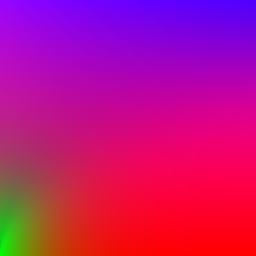

In [45]:
# visualise some of the structures in the dataset by changing the index
from load_atoms import view

idx = 250
view(structures[idx], show_bonds=True)

In [17]:
# write the structures to a file and inspect its content
# you can use the write function from ase.io

ase.io.write("structures.cif", structures, format="xyz")


## Generate descriptors
Descriptors are a way to represent atomic structures in a way that is suitable for machine learning. They are typically based on the positions of atoms and their chemical environments. In this exercise, you should implement a simple descriptor based on the distances between atoms, the angle between atoms and also the coordination number. Refer to the ASE documentation for functions to help calculate these properties (or if you are feeling adventurous, you can implement them yourself)!

Some questions to consider:
1. What are the differences in distances between atoms structures with different densities?
2. What are the differences in angles between atoms structures with different densities?
3. What are the coordination numbers in structures with different densities? What happens when you change the cutoff radius? Is it possible to find a cutoff radius which first neighbour bonding information? 
4. Can you find patterns across the different structures and the corresponding descriptors?
5. Look at the size of the descriptors generated. How much more data are you generating through angular compared to distance descriptors? What body order descriptors are you generating?

In [51]:
from ase.neighborlist import neighbor_list

import numpy as np

In [62]:
structure_0 = structures[400]

i, j, d = neighbor_list("ijd", structure_0, cutoff=3.7)
print(i)
print(j)
print(d)

[  0   0   0 ... 199 199 199]
[ 78  71  36 ...  89 108 163]
[3.5988708  3.57063121 3.47547919 ... 2.79616017 3.65051246 3.47072336]


In [63]:
coordination_num = np.bincount(i)

coordination_num


array([32, 30, 30, 29, 29, 25, 30, 34, 32, 27, 37, 27, 32, 34, 24, 23, 25,
       25, 26, 33, 29, 22, 27, 33, 30, 25, 37, 29, 25, 31, 27, 27, 28, 31,
       21, 29, 30, 27, 29, 28, 29, 31, 31, 27, 24, 33, 31, 33, 31, 34, 28,
       29, 30, 29, 32, 30, 26, 35, 29, 28, 30, 36, 32, 32, 31, 30, 34, 26,
       25, 28, 29, 33, 24, 34, 33, 26, 33, 35, 30, 33, 23, 29, 34, 30, 32,
       37, 34, 25, 33, 21, 34, 26, 31, 37, 32, 31, 36, 33, 24, 28, 28, 27,
       26, 32, 27, 27, 27, 32, 30, 32, 26, 30, 30, 22, 23, 32, 21, 24, 30,
       23, 34, 35, 36, 30, 24, 31, 35, 26, 29, 30, 33, 35, 30, 30, 27, 32,
       24, 31, 31, 30, 28, 27, 28, 31, 29, 27, 30, 34, 27, 26, 27, 28, 30,
       30, 32, 34, 28, 32, 33, 27, 27, 34, 23, 29, 31, 24, 31, 30, 32, 31,
       29, 35, 28, 29, 34, 38, 33, 23, 34, 28, 31, 31, 27, 26, 33, 32, 34,
       34, 32, 30, 29, 28, 33, 36, 36, 30, 33, 27, 31, 31], dtype=int64)

(array([ 4.,  0.,  5.,  0., 27.,  0., 52.,  0., 52.,  0.,  0., 28.,  0.,
        19.,  0.,  7.,  0.,  4.,  0.,  2.]),
 array([30.  , 30.45, 30.9 , 31.35, 31.8 , 32.25, 32.7 , 33.15, 33.6 ,
        34.05, 34.5 , 34.95, 35.4 , 35.85, 36.3 , 36.75, 37.2 , 37.65,
        38.1 , 38.55, 39.  ]),
 <BarContainer object of 20 artists>)

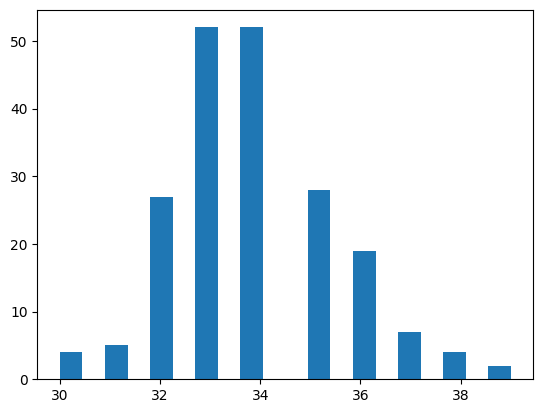

In [56]:
import matplotlib.pyplot as plt

plt.hist(coordination_num, bins=20)

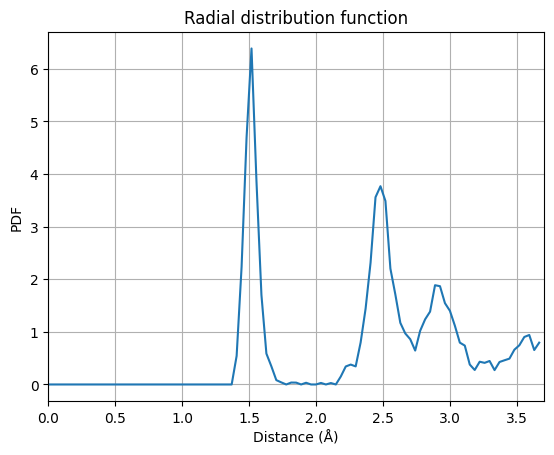

In [ ]:
# plot the radial distribution function – look in the ASE docs for how to do this https://wiki.fysik.dtu.dk/ase/ase/neighborlist.html#ase.neighborlist.neighbor_list

cutoff = 3.7
hist, bin_edges = np.histogram(d, bins=100, range=(0.0, cutoff))
hist = hist / len(structure_0)  # per atom
rho_mean = len(structure_0) / structure_0.cell.volume
dv = 4.0 * np.pi * (bin_edges[1:] ** 3 - bin_edges[:-1] ** 3) / 3.0
rho = hist / dv
pdf = rho / rho_mean

# plot the PDF
plt.plot(bin_edges[:-1], pdf)
plt.xlabel("Distance (Å)") 
plt.ylabel("PDF")
plt.title("Radial distribution function")
plt.xlim(0, cutoff)
plt.grid()
plt.show()


(array([  2.,   2.,   2.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.,   2.,   2.,   2.,   2.,   6.,  17.,  23.,  58.,  93., 183.,
        281., 229., 122.,  66.,  41.,  20.,  13.,   5.,   8.,   2.,   4.,
          1.,   4.,   0.,   0.,   0.,   1.,   1.]),
 array([ 44.10203498,  46.97181984,  49.84160471,  52.71138958,
         55.58117444,  58.45095931,  61.32074418,  64.19052905,
         67.06031391,  69.93009878,  72.79988365,  75.66966851,
         78.53945338,  81.40923825,  84.27902312,  87.14880798,
         90.01859285,  92.88837772,  95.75816258,  98.62794745,
        101.49773232, 104.36751718, 107.23730205, 110.10708692,
        112.97687179, 115.84665665, 118.71644152, 121.58622639,
        124.45601125, 127.32579612, 130.19558099, 133.06536586,
        135.93515072, 138.80493559, 141.67472046, 144.54450532,
        147.41429019, 150.28407506, 153.15385993, 156.02364479,
        158.89342966]),
 <BarContainer object of 40 artists>)

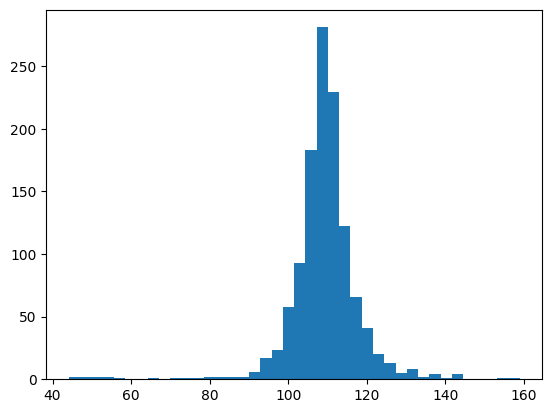

In [60]:
# plot the angular distribution function – look at the ASE docs for how to do this https://wiki.fysik.dtu.dk/ase/ase/geometry.html#ase.geometry.analysis.Analysis.get_angles

from ase.geometry.analysis import Analysis

analysis = Analysis(structure_0)
CCCAngles = analysis.get_angles("C", "C", "C", unique=True)
CCCAngleValues = analysis.get_values(CCCAngles)

plt.hist(CCCAngleValues, bins=40)

## Part 2
## Many-body descriptors
In the last part of the class, we focused on two- and three-body descriptors and building a representation of this data through the radial distribution function (RDF) and the angular distribution function (ADF). The RDF is a measure of the probability of finding an atom at a certain distance from another atom, while the ADF is a measure of the probability of finding an atom at a certain angle with respect to another atom. These functions are useful for understanding the local structure of materials and can be used to identify different phases or structures and can be generated experimentally through X-ray diffraction or neutron scattering experiments.

We now move to many-body descriptors, which provide a more complex and detailed representation of atomic structures. Unlike simpler pairwise and angular descriptors, many-body descriptors account for interactions among more atoms, capturing richer structural information. One widely used many-body descriptor is the Smooth Overlap of Atomic Positions (SOAP). SOAP represents the local atomic environment around each atom as a continuous atomic density, constructed by placing Gaussian functions on neighboring atoms. This smooth density is then expanded in a basis of radial functions and spherical harmonics. The key idea is to compare atomic environments by computing the similarity between these densities, using an inner product that is invariant to rotations and permutations. This makes SOAP a powerful and flexible tool for characterising local atomic environments, enabling accurate predictions in machine learning models and aiding in the identification of structural motifs or phases in materials.

However, SOAP descriptors are high dimensional and so visualising the data becomes difficult. To overcome this, we can use dimensionality reduction techniques such as principal component analysis (PCA) to reduce the dimensionality of the SOAP descriptors. PCA is a statistical technique that transforms the data into a new coordinate system, where the greatest variance is captured in the first few dimensions. This allows us to visualise the data in a lower-dimensional space while retaining most of the information (hopefully). We collaquially refer to these as "SOAP maps".

In [5]:
# Lets build the SOAP descriptor using quippy, a package for calculating atomic-scale descriptors. The documentation is here: https://libatoms.github.io/QUIP/
from quippy.descriptors import Descriptor

desc = Descriptor("soap cutoff=3.7 n_max=4 l_max=4 atom_sigma=0.5") # Play around with the parameters to see how they affect the descriptor. cutoff is the cutoff radius, n_max is the maximum number of radial basis functions, l_max is the maximum number of angular basis functions, and atom_sigma is the width of the Gaussian used to smooth the atomic density.
soaps = desc.calc(structure_0)["data"]
soaps.shape

AttributeError: module 'quippy' has no attribute 'descriptors_module'

In [ ]:
# Let's write a function to do dimensionality reduction for us
# Add other methods to the below function

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def do_analysis(data, method, **kwargs):
    """
    Function to perform a dimensionality reduction analysis on the
    descriptors.
    """

    # scale the data.
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # perform the analysis.
    if method == "pca":
        pca = PCA(n_components=2)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        # print(scaled_data.shape)
        # print(x_pca.shape)
        return x_pca

    else:
        print("Error: method not recognised.")
        return None

In [ ]:
pca_data = do_analysis(soaps, "pca")

In [ ]:
import chemiscope

properties = {
    "PCA": {
        "target": "atom",
        "values": pca_data,
        "description": "PCA of per-atom representation of the structures",
    },
    "coordination_num": {
        "target": "atom",
        "values": coordination_num,
        "description": "Coordination number of each atom",
    },
    "local_energy": {
        "target": "atom",
        "values": structure_0.arrays["local_energies"],
        "description": "Local energies predicted with C-GAP-17",
    },
}

# properties_total = properties | frame_properties
ats_envs = chemiscope.all_atomic_environments([structure_0], cutoff=3.7)
chemiscope.show(frames=[structure_0], properties=properties, environments=ats_envs)

In [ ]:
# try again but for structures with higher densities ...

In [ ]:
from quippy.descriptors import Descriptor

desc = Descriptor("soap cutoff=3.7 n_max=4 l_max=4 atom_sigma=0.5 average=T")
soaps = np.array([desc.calc(s)["data"] for s in structures])
soaps.shape
soaps = soaps.reshape(soaps.shape[0], -1)

In [ ]:
pca_data = do_analysis(soaps, "pca")

In [ ]:
structure_0.info

In [ ]:
properties = {
    "PCA": {
        "target": "structure",
        "values": pca_data,
        "description": "PCA of per-atom representation of the structures",
    },
    "density": {
        "target": "structure",
        "values": [s.info["density"] for s in structures],
        "description": "Density of the structure",
    },
    "total_energy": {
        "target": "structure",
        "values": [s.info["energy"] for s in structures],
        "description": "Total energies predicted with C-GAP-17",
    },
    "anneal_T": {
        "target": "structure",
        "values": [s.info["anneal_T"] for s in structures],
        "description": "Annealing temperature of the structure",
    },
}

# properties_total = properties | frame_properties
chemiscope.show(frames=structures, properties=properties)

## Part 3
# Predicting local energies

We have now generated a large number of descriptors and we can use these to predict the local energy of the atomic structures. We will use a simple linear regression model to predict the local energy of the atomic structures based on the descriptors we have generated. We will also use cross-validation to evaluate the performance of the model and to ensure that it is not overfitting to the training data.

We will use the scikit-learn package for this. The documentation is available at:
https://scikit-learn.org/stable/

In [ ]:
# load structures and split the data into training, validation and test
structures = load_dataset("structures_filt.xyz")
train, val, test = structures.random_split([0.8, 0.1, 0.1], seed=42)

In [ ]:
# get the target labels
energies_train = train.arrays["local_energies"]
energies_val = val.arrays["local_energies"]
energies_test = test.arrays["local_energies"]

In [ ]:
# generate the SOAP descriptors for the training, validation, and test sets

desc = Descriptor("soap cutoff=3.7 n_max=4 l_max=4 atom_sigma=0.5")
soaps_train = np.array([desc.calc(s)["data"] for s in train])
soaps_val = np.array([desc.calc(s)["data"] for s in val])
soaps_test = np.array([desc.calc(s)["data"] for s in test])

### linear model


you can implement your own linear model or use `scikit-learn`'s implementation; familiarise yourself with how the model is initialised, trained, and validated/tested


the descriptors are reshaped so that the first dimension matches that of the labels


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(soaps_train.reshape(-1, soaps_train.shape[-1]), energies_train)

In [ ]:
energies_train_pred = model.predict(soaps_train.reshape(-1, soaps_train.shape[-1]))
energies_val_pred = model.predict(soaps_val.reshape(-1, soaps_val.shape[-1]))
energies_test_pred = model.predict(soaps_test.reshape(-1, soaps_test.shape[-1]))

In [ ]:
plt.scatter(energies_train, energies_train_pred, s=4, label="reference")
plt.scatter(energies_test, energies_test_pred, s=4, label="ML")
plt.axline((energies_train[0], energies_train[0]), slope=1, color="red", linestyle="--")

plt.legend()

In [ ]:
# evaluate the model's performance by computing the mean absolute error (MAE) and the root mean square error (RMSE) on the test set

### ridge regression


the ridge regression differs from the linear regression by the introduction of the regularisation term, noted alpha $\alpha$ in `scikit-learn`


In [ ]:
from sklearn.linear_model import Ridge

alpha = ...  # experiment with different values of alpha
model = Ridge(alpha=alpha)
model.fit(soaps_train.reshape(-1, soaps_train.shape[-1]), energies_train)

In [ ]:
train_pred = model.predict(soaps_train.reshape(-1, soaps_train.shape[-1]))
val_pred = model.predict(soaps_val.reshape(-1, soaps_val.shape[-1]))
test_pred = model.predict(soaps_test.reshape(-1, soaps_test.shape[-1]))

In [ ]:
plt.scatter(energies_train, energies_train_pred, s=4, label="reference")
plt.scatter(energies_test, energies_test_pred, s=4, label="ML")
plt.axline((energies_train[0], energies_train[0]), slope=1, color="red", linestyle="--")

plt.legend()

In [ ]:
# using the validation set, find the optimal value of the regularisation and evaluate the performance metrics of this model on the test set

...

In [ ]:
# try the neural network model from scikit-learn
# implement a simple kernel model (or Gaussian Process Regression model) as detailed in the GPR review; you can also use kernel ridge regression from scikit-learn.